In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
sns.__version__

'0.13.0'

In [3]:
import matplotlib as mpl
mpl.__version__

'3.8.0'

Let's start off from loading a dataset about penguins: 

In [4]:
data = sns.load_dataset('penguins')

In [5]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We can use seaborn to visualize it on a scatterplot:

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

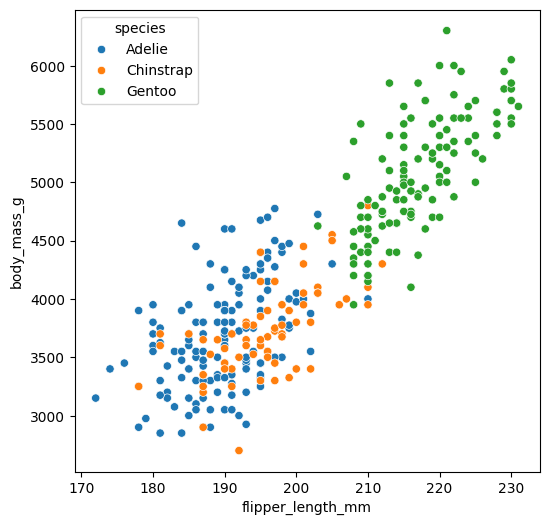

In [6]:
f, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=data, hue="species", ax=ax)

How to get to the same result using pure mpl?

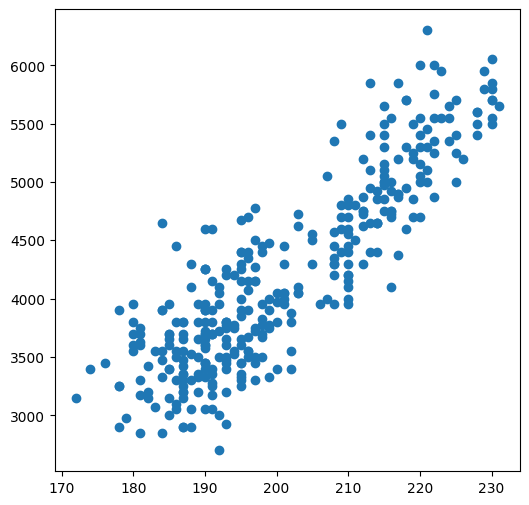

In [7]:
f, ax = plt.subplots(figsize=(6,6))
ax.scatter(x=data['flipper_length_mm'], y=data['body_mass_g']) # we cannot differentiate in hue like in seaborn

We need to overlap 3 scatter plots on top of each other:  

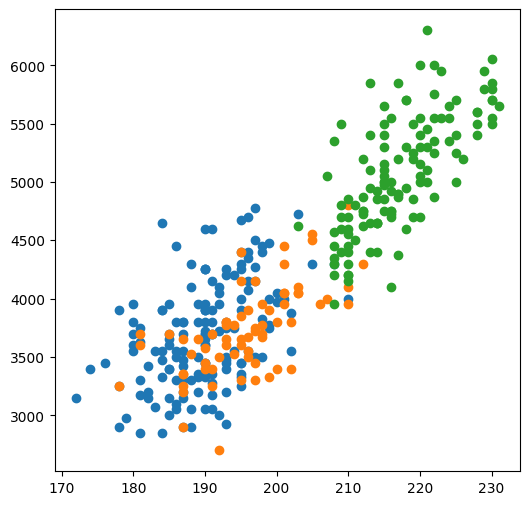

In [8]:
f, ax = plt.subplots(figsize=(6,6))
for sp in data['species'].unique():
    ax.scatter(x='flipper_length_mm', y='body_mass_g', data=data.query('species == @sp')) 
    # mpl can now also accept seaborn-like syntax

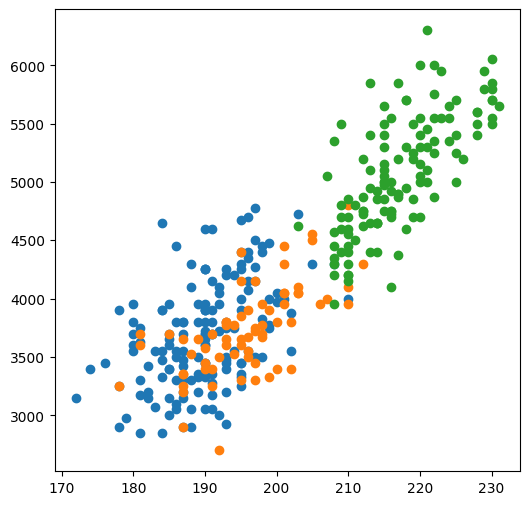

In [9]:
f, ax = plt.subplots(figsize=(6,6))
for sp in data['species'].unique():
    tmp_data = data.query('species == @sp') # we want to separate manipulating data from plotting data 
    ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'],)

For a better control of styling, we can use dictionaries: 

In [10]:
data['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [11]:
species_styles = {
    'Adelie': {'color': 'tomato', 's': 100, 'alpha': 0.5}, 
    'Chinstrap': {'color': 'dodgerblue', 'marker': 'v'}, 
    'Gentoo': {'color': 'darkgray', 'edgecolor':'black'}
}

In [12]:
species_styles['Adelie']

{'color': 'tomato', 's': 100, 'alpha': 0.5}

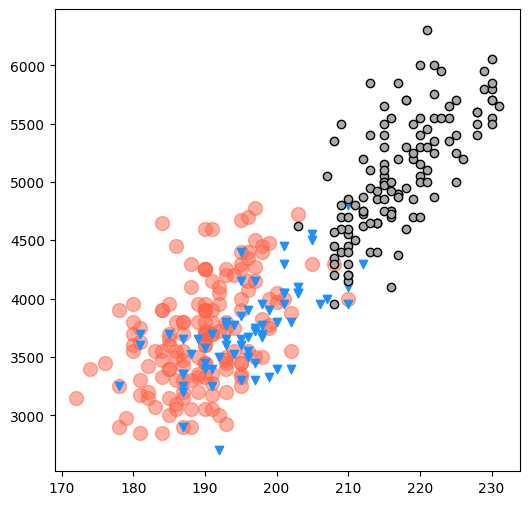

In [13]:
f, ax = plt.subplots(figsize=(6,6))
for sp in data['species'].unique():
    tmp_data = data.query('species == @sp')
    ax.scatter(x=tmp_data['flipper_length_mm'], y=tmp_data['body_mass_g'], **species_styles[sp])